In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

df = pd.read_csv('C:/Users/areum/Desktop/POC시연자료/상관분석_혈압나이성별온도.csv')

In [36]:
df['sex'] = df['sex'].map({'F':0, 'M':1})

In [37]:
df = df.dropna(axis=0)
df = df.astype('float')

In [38]:
x = df.iloc[:, 1:]
y = df.iloc[:, [0]]

In [39]:
x_train, x_test,y_train, y_test =train_test_split(x,y,train_size = 0.8,
                                                  test_size = 0.2,random_state=42)

In [40]:
x_train.shape, x_test.shape

((1771, 7), (443, 7))

In [41]:
# 모델 적용
ridge = Ridge()
ridge.fit(x_train, y_train)
print(ridge.score(x_train,y_train))
print(ridge.score(x_test, y_test))

0.651257932734155
0.6563987131830106


In [42]:
# 모델을 사용해서 만든 예측값
y_predict = ridge.predict(x_test)

In [43]:
# 실제 키 값
y_test=y_test.reset_index(drop=True)
y_test.columns = ['실제값']

In [44]:
result_all=pd.concat([y_test,pd.DataFrame(y_predict, columns=['예측값'])], axis=1)
result_all

,실제값,예측값
0,168.4,170.488008
1,168.0,165.316359
2,158.0,161.534781
3,169.0,170.445533
4,165.0,168.316135
...,...,...
438,175.2,172.142337
439,163.2,160.149289
440,154.0,160.306124
441,167.0,172.772881


In [45]:
오차값=result_all.실제값-result_all.예측값

In [46]:
result_all=pd.concat([result_all, pd.DataFrame(result_all.실제값-result_all.예측값,columns=['오차값'])],axis=1)

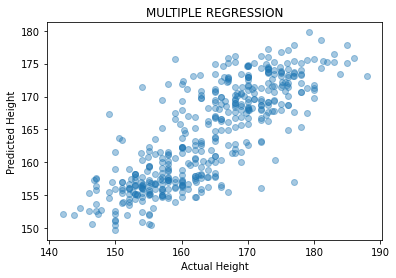

In [93]:
# 위 예측값과 실제 키 값을 시각화
import matplotlib.pyplot as plt
plt.scatter(result_all.실제값, result_all.예측값, alpha=0.4)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.title("RIDGE REGRESSION")
plt.show()

In [88]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]
Ridge_alpha=[]

In [89]:
alpha_list=[0.001,0.01,0.1,10,100]
for alpha in alpha_list:
    ridge=Ridge(alpha=alpha)
    ridge.fit(x_train,y_train)
    Ridge_alpha.append(alpha)
    train_score.append(ridge.score(x_train, y_train))
    test_score.append(ridge.score(x_test, y_test))

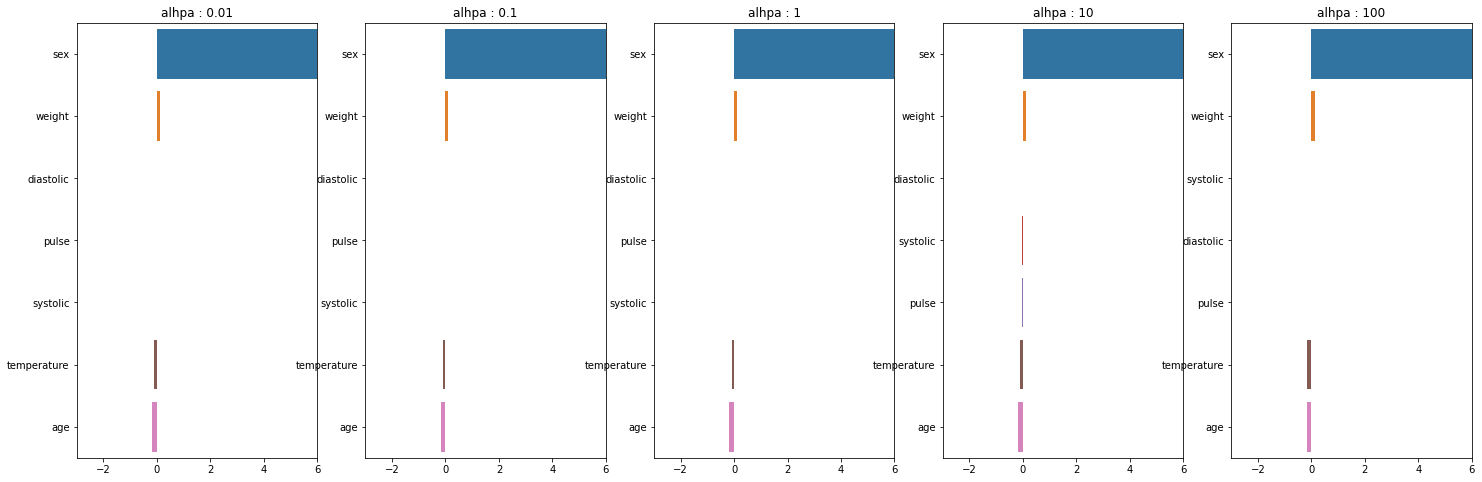

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
alphas = [0.01, 0.1, 1, 10, 100]
fig, axs = plt.subplots(figsize  = (25,8), nrows = 1, ncols = 5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_train, y_train)
    
    coeff = pd.Series(data = np.array(ridge.coef_).reshape(7), index = x_train.columns)
    colnames = 'alhpa : ' + str(alpha)
    coeff_df[colnames] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colnames)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    plt.savefig('image.png')

In [77]:
coeff

sex            8.806365
weight         0.126488
systolic      -0.000832
diastolic     -0.002286
pulse         -0.010956
temperature   -0.155366
age           -0.178631
dtype: float64

In [71]:
np.array(ridge.coef_).reshape(7)

array([-1.78630728e-01,  8.80636523e+00,  1.26488130e-01, -2.28555243e-03,
       -8.31951325e-04, -1.55366161e-01, -1.09560483e-02])

In [72]:
x_train.columns

Index(['age', 'sex', 'weight', 'diastolic', 'systolic', 'temperature',
       'pulse'],
      dtype='object')

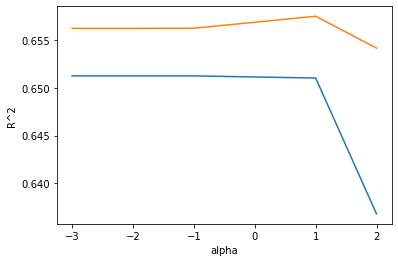

In [82]:
import numpy as np
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [19]:
col_name1=['train_score_alpha']
train_score_alpha=pd.DataFrame(train_score, columns=col_name1)

col_name2=['test_score_alpha']
test_score_alpha=pd.DataFrame(test_score, columns=col_name2)

In [90]:
ridge=Ridge(alpha=0.01)
ridge.fit(x_train,y_train)
print(ridge.score(x_train,y_train))
print(ridge.score(x_test, y_test))

0.6512602911903115
0.6562494569898103


In [21]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [22]:
ridge_r2=r2_score(y_test,y_predict)
ridge_mse=mean_squared_error(y_test,y_predict)
ridge_mae=mean_absolute_error(y_test,y_predict)

In [23]:
Ridge_r2 = [str(ridge_r2)]
Ridge_r2 = pd.DataFrame(Ridge_r2)
Ridge_r2.rename(columns={Ridge_r2.columns[0]: "R2_score"}, inplace=True)

Ridge_mse = [str(ridge_mse)]
Ridge_mse = pd.DataFrame(Ridge_mse)
Ridge_mse.rename(columns={Ridge_mse.columns[0]: "MSE"}, inplace=True)

Ridge_mae = [str(ridge_mae)]
Ridge_mae= pd.DataFrame(Ridge_mae)
Ridge_mae.rename(columns={Ridge_mae.columns[0]: "MAE"}, inplace=True)

In [24]:
corr_df = df.corr()
corr_df = corr_df.apply(lambda x: round(x, 2))
corr_df_unstack = corr_df.unstack()

In [25]:
corr_df2=corr_df.reset_index()

In [26]:
corr_df2

,index,height,age,sex,weight,diastolic,systolic,temperature,pulse
0,height,1.00,-0.39,0.71,0.51,0.05,0.14,-0.04,0.01
1,age,-0.39,1.00,-0.08,-0.16,-0.02,0.10,-0.04,-0.15
2,sex,0.71,-0.08,1.00,0.42,0.07,0.22,-0.07,-0.02
3,weight,0.51,-0.16,0.42,1.00,0.12,0.29,-0.02,0.01
4,diastolic,0.05,-0.02,0.07,0.12,1.00,0.39,-0.00,0.07
5,systolic,0.14,0.10,0.22,0.29,0.39,1.00,0.01,0.11
6,temperature,-0.04,-0.04,-0.07,-0.02,-0.00,0.01,1.00,0.07
7,pulse,0.01,-0.15,-0.02,0.01,0.07,0.11,0.07,1.00


In [27]:
result_all = pd.concat([result_all,corr_df2 ], axis=1)

result_all = pd.concat([result_all,train_score_alpha ], axis=1)
result_all = pd.concat([result_all,test_score_alpha ], axis=1)

result_all = pd.concat([result_all,Ridge_r2 ], axis=1)
result_all = pd.concat([result_all,Ridge_mse ], axis=1)
result_all = pd.concat([result_all,Ridge_mae ], axis=1)

In [28]:
result_all

,x,y,index,height,age,sex,weight,diastolic,systolic,temperature,pulse,train_score_alpha,test_score_alpha,R2_score,MSE,MAE
0,168,170.393542,height,1.00,-0.39,0.71,0.51,0.05,0.14,-0.04,0.01,0.650488,0.653100,0.653257838258368,28.781537656859477,4.196340792367492
1,168,165.262647,age,-0.39,1.00,-0.08,-0.16,-0.02,0.10,-0.04,-0.15,0.650488,0.653101,NaN,NaN,NaN
2,158,161.473601,sex,0.71,-0.08,1.00,0.42,0.07,0.22,-0.07,-0.02,0.650488,0.653116,NaN,NaN,NaN
3,169,170.388350,weight,0.51,-0.16,0.42,1.00,0.12,0.29,-0.02,0.01,0.650264,0.654447,NaN,NaN,NaN
4,165,168.246794,diastolic,0.05,-0.02,0.07,0.12,1.00,0.39,-0.00,0.07,0.636004,0.651627,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,175,172.039251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439,163,159.992088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440,154,160.266414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441,167,172.746787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
 a = pd.DataFrame(list(zip(x_train.columns, np.array(ridge.coef_).reshape(7))),columns=['features', 'importances']).sort_values('importances')

In [69]:
np.array(ridge.coef_).reshape(7)

array([-1.76036410e-01,  1.12626197e+01,  1.01052438e-01, -8.61552151e-04,
       -1.03696704e-02, -9.67547610e-02, -8.95264734e-03])

In [88]:
ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)

Text(0.5, 1.0, 'Ridge alpha=0.01')

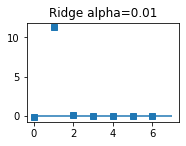

In [101]:
plt.subplot(2, 2, 4)
plt.hlines(0,0, len(np.array(ridge01.coef_).reshape(7)))
plt.plot(np.array(ridge01.coef_).reshape(7), 's', label="Ridge alpha=0.01")
plt.title('Ridge alpha=0.01')

In [102]:
ridge01.coef_

array([[-1.76037095e-01,  1.12632784e+01,  1.01293899e-01,
        -8.12976037e-04, -1.09618979e-02, -6.37070257e-02,
        -9.12025565e-03]])

In [92]:
len(np.array(ridge.coef_).reshape(7))

7

In [92]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score

alphas = [0, 0.001, 0.01, 0.1, 1]

# RidgeCV는 alpha로 넣고자 하는 값들을 리스트로 전달하면 내부적으로 최적의 alpha값을 찾아냄
ridgecv = RidgeCV(alphas=alphas, normalize=True, cv=5)
# cv : cross-validation -> 데이터를 k등분한 후 각각에 대하여 검증 진행
# 검증 결과 가장 점수가 높은 모델을 채택
ridgecv.fit(x_train, y_train)
y_pred = ridgecv.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

print(f'alpha: {ridgecv.alpha_}') # 최종 결정된 alpha값
print(f'cv best score: {ridgecv.best_score_}') 

Test MAE: $4
R2 Score: 0.6569

alpha: 0.1
cv best score: 0.5812090692205603
